In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

Files already downloaded and verified
Files already downloaded and verified


<IPython.core.display.Javascript object>


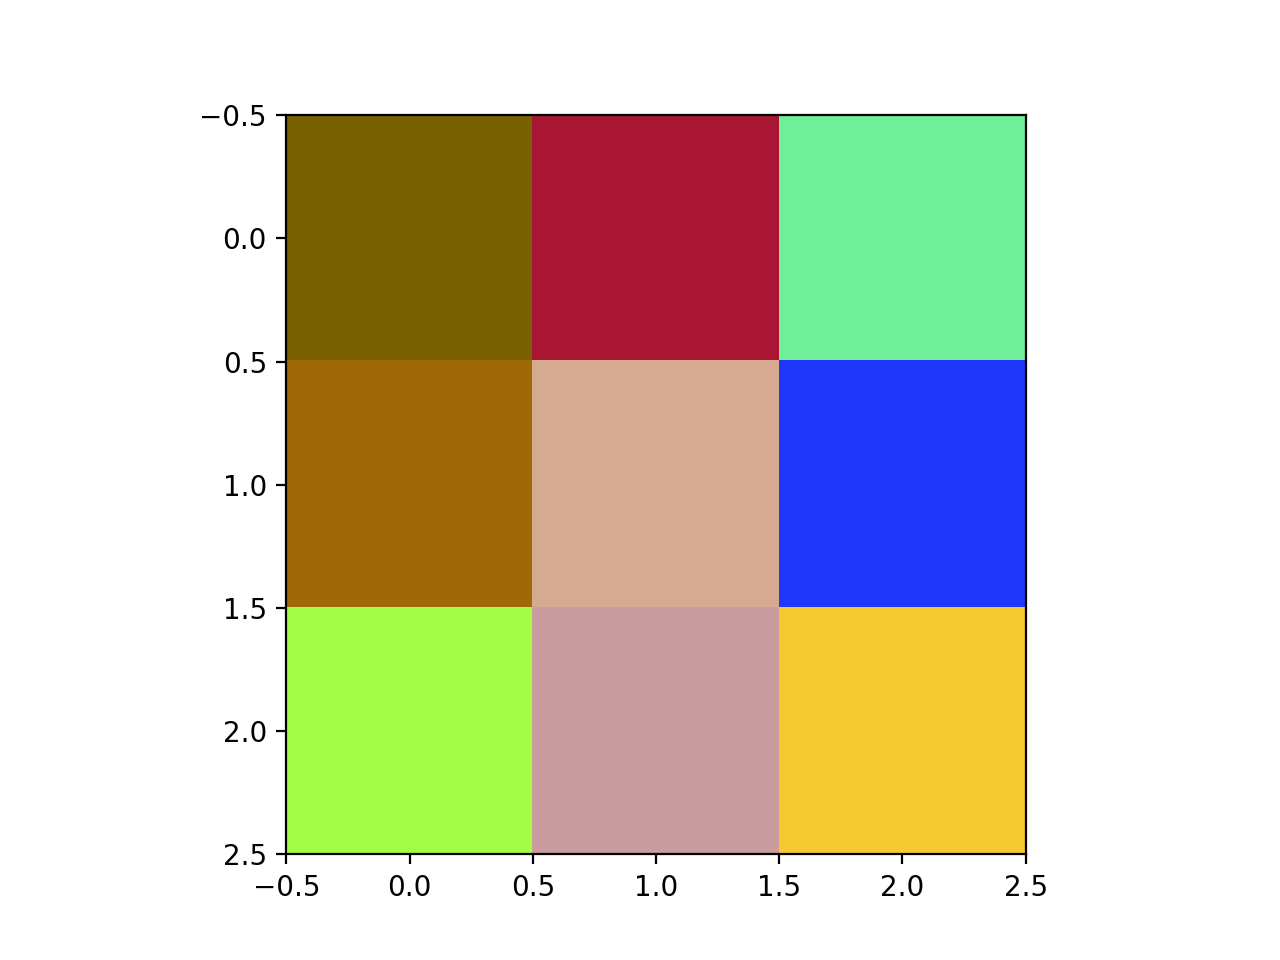

 bird truck  ship   dog


Process Process-1:
Process Process-2:
Traceback (most recent call last):
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self._target(*self._args, **self._kwargs)
    self.run()
  File "/usr/local/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.framework/Versions/2.7/lib/python2.7/multiprocessing/process.py", line 114, in run
    r = index_queue.get()
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python/2.7.13/Frameworks/Python.fra

In [7]:
%matplotlib nbagg
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [34]:
#vgg16 = torchvision.models.vgg16(pretrained=False)
vgg_model = vgg_lite()

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(vgg_model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
activations=[]
activation_to_layer={}
activation_index=0
for layer, (name, module) in enumerate(vgg_model.features._modules.items()):
    x = module(x)
    if isinstance(module, torch.nn.modules.conv.Conv2d):
        x.register_hook(self.compute_rank)
        activations.append(x)
        activation_to_layer[activation_index] = layer
        activation_index += 1

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = vgg_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

In [42]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = vgg_model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 20 %


<IPython.core.display.Javascript object>


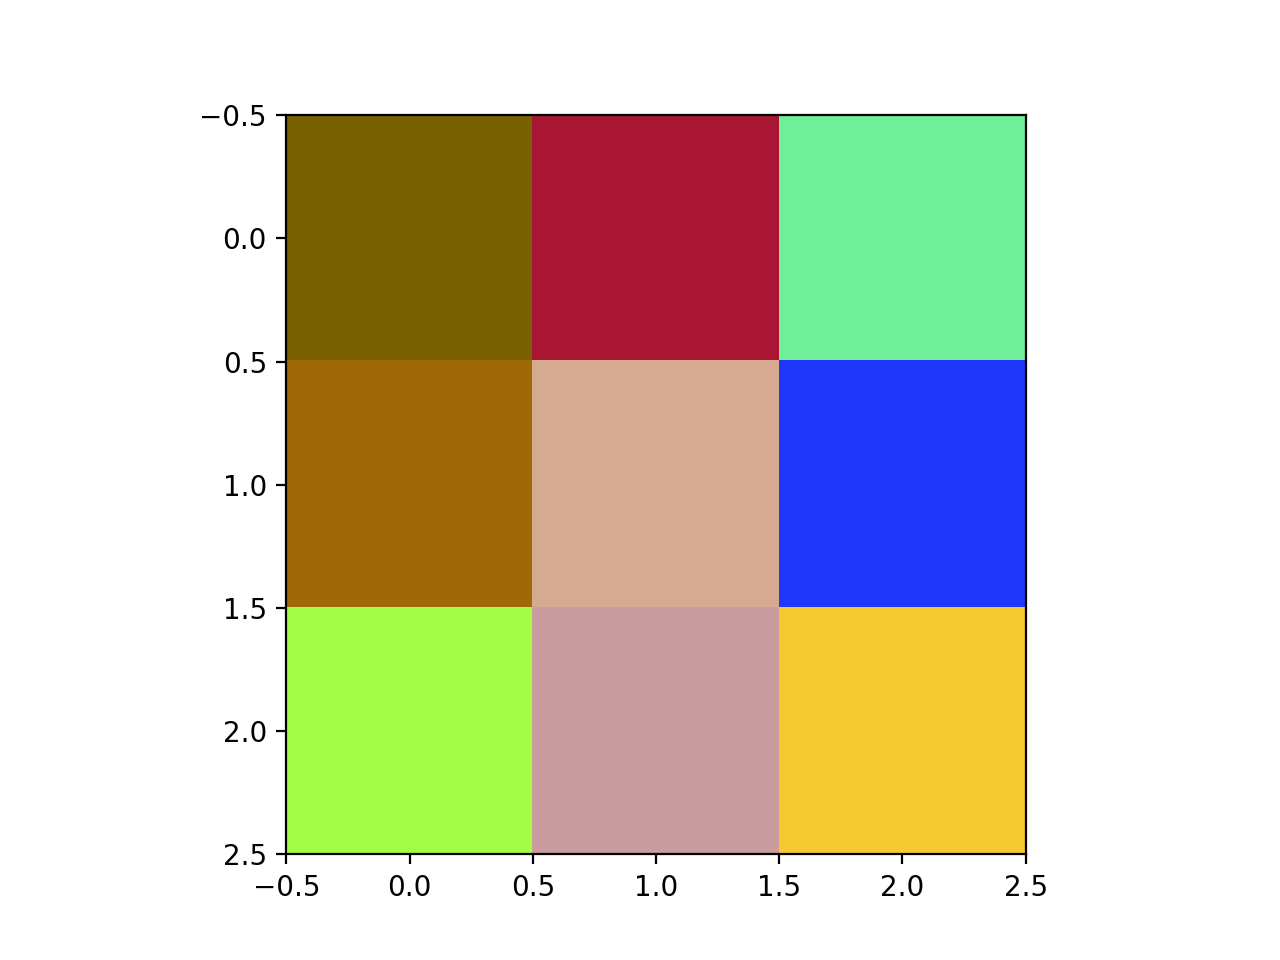

In [56]:
def plot_kernels(tensor, num_cols=6):
    if not tensor.ndim==4:
        raise Exception("assumes a 4D tensor")
    if not tensor.shape[-1]==3:
        raise Exception("last dim needs to be 3 to plot")
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(tensor.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        ax1.imshow(tensor[i])
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    
mm = vgg_model.double()
filters = mm.modules
body_model = [i for i in mm.children()][0]
layer1 = body_model[0]
tensor = layer1.weight.data.numpy()
plt.figure()
plt.imshow(tensor[0])


In [41]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = vgg_model(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 35 %
Accuracy of   car : 13 %
Accuracy of  bird :  0 %
Accuracy of   cat :  4 %
Accuracy of  deer : 11 %
Accuracy of   dog :  0 %
Accuracy of  frog : 66 %
Accuracy of horse : 28 %
Accuracy of  ship : 24 %
Accuracy of truck : 25 %


In [33]:
'''
Modified from https://github.com/pytorch/vision.git
'''
import math

import torch.nn as nn
import torch.nn.init as init

__all__ = [
    'VGG', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn',
    'vgg19_bn', 'vgg19',
]

class VGG(nn.Module):
    def __init__(self, features,width=512):
        super(VGG, self).__init__()
        self.features = features
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(width, width),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(width, width),
            nn.ReLU(True),
            nn.Linear(width, 10),
        )
         # Initialize weights
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
                m.bias.data.zero_()


    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


def make_layers(cfg, batch_norm=False):
    layers = []
    in_channels = 3
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers)

cfg = {
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 
          512, 512, 512, 512, 'M'],
    'T': [2, 'M', 4, 'M', 8, 8, 'M', 16, 16, 'M', 16, 16, 'M'],

}
def vgg_lite():
    return VGG(make_layers(cfg['T']),width=16)

def vgg11():
    """VGG 11-layer model (configuration "A")"""
    return VGG(make_layers(cfg['A']))


def vgg11_bn():
    """VGG 11-layer model (configuration "A") with batch normalization"""
    return VGG(make_layers(cfg['A'], batch_norm=True))


def vgg13():
    """VGG 13-layer model (configuration "B")"""
    return VGG(make_layers(cfg['B']))


def vgg13_bn():
    """VGG 13-layer model (configuration "B") with batch normalization"""
    return VGG(make_layers(cfg['B'], batch_norm=True))


def vgg16():
    """VGG 16-layer model (configuration "D")"""
    return VGG(make_layers(cfg['D']))


def vgg16_bn():
    """VGG 16-layer model (configuration "D") with batch normalization"""
    return VGG(make_layers(cfg['D'], batch_norm=True))


def vgg19():
    """VGG 19-layer model (configuration "E")"""
    return VGG(make_layers(cfg['E']))


def vgg19_bn():
    """VGG 19-layer model (configuration 'E') with batch normalization"""
    return VGG(make_layers(cfg['E'], batch_norm=True))

In [ ]:
class PruneWrap():
    def __init__(self, model,gpu=False):
        self.model = model
        self.gpu = gpu
        self.criterion = torch.nn.CrossEntropyLoss()
    def test(self,test_data_loader):
        self.model.eval()
        correct = 0
        total = 0
        for i, (batch, label) in enumerate(test_data_loader):
            batch = batch.cuda()
            output = model(Variable(batch))
            pred = output.data.max(1)[1]
            correct += pred.cpu().eq(label).sum()
            total += label.size(0)
        print "acc :", float(correct) / total
    def train(self, optimizer = None, epoches = 10):
        if optimizer is None:
            optimizer = optim.SGD(model.classifier.parameters(), lr=0.0001, momentum=0.9)
        for i in range(epoches):
            print "epoch: ", i
            for batch, label in self.train_data_loader:
                batch,label = (batch.cuda(),label.cuda) if self.gpu
                self.model.zero_grad()
                input = Variable(batch)            
        self.test()
        print "Finished fine tuning."
    def rank_prunes(self):
        for batch, label in self.train_data_loader:
                batch,label = (batch.cuda(),label.cuda) if self.gpu
                self.model.zero_grad()
                input = Variable(batch)
        
        self.prunner.normalize_ranks_per_layer()

        return self.prunner.get_prunning_plan(num_filters_to_prune)
    def normalize_ranks_per_layer(self):
        for i in self.filter_ranks:
            v = torch.abs(self.filter_ranks[i])
            v = v / np.sqrt(torch.sum(v * v))
    def compute_rank(self, grad):
        activation_index = len(self.activations) - self.grad_index - 1
        activation = self.activations[activation_index]
        values = torch.sum((activation * grad), dim = 0).sum(dim=2).sum(dim=3)[0, :, 0, 0].data

        # Normalize the rank by the filter dimensions
        values = values / (activation.size(0) * activation.size(2) * activation.size(3))

        if activation_index not in self.filter_ranks:
            self.filter_ranks[activation_index] = torch.FloatTensor(activation.size(1)).zero_().cuda()

        self.filter_ranks[activation_index] += values
        self.grad_index += 1


### adapted from https://github.com/pytorch/vision/blob/master/torchvision/models/vgg.py

notes:

questions?:
    1. Data involved or data agnostic
    2. during training or after
    3. Inference citeria, or backprop criteria.
    
 Channel-wise
SSL [49] reaches high compression ratio for first few conv
layers of LeNet [30] and AlexNet [26]. [54] could work
well for fully connected layers. However, training-based
approaches are more costly, and the effectiveness for very
deep networks on large datasets is rarely exploited

